### Importing modules

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Getting data

In [42]:

#read comma separated data
data = pd.read_csv('data1.1.txt',index_col=False)
x = data['0'].values.reshape(-1,1)
y = data['1'].values.reshape(-1,1)

#number of training examples
m = len(y)

#testing examples
testData = np.array([[5.3054,1.9869],[8.2934,0.14454],[13.394,9.0551],[5.4369,0.61705]])


X = addBias(x)

# Initialize fitting parameters

theta = np.zeros((2, 1))
# h_theta = X*theta
iterations = 1500
alpha = 0.01


### Plotting raw data

Text(0.5, 0, 'Population of City in 10,000s')

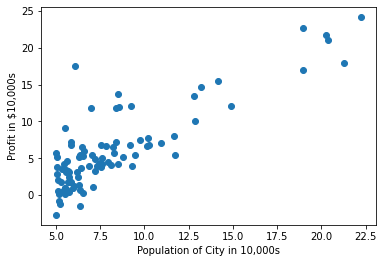

In [43]:
# Plot the data
plt.scatter(x, y)

#Set the y−axis label
plt.ylabel('Profit in $10,000s')

#Set the x−axis label
plt.xlabel('Population of City in 10,000s')


### Functions to perform various opertaions

The objective of linear regression is to minimize the cost function,

$J(\theta) = \frac{1}{2*m}\sum\limits _{i=1} ^{m}(h_\theta^{(i)}-y^{(i)})^2$

where the hypothesis $h(\theta)$ is given by the linear model,

$h(\theta) = \theta^Tx = \theta_0 + \theta_1  x_1$


$\theta_j= \theta_j − \frac{\alpha}{m}[h_\theta (x^{(i)}) − y^{(i)}]x^{(i)}$

In [44]:
def addBias(x):
    #number of training examples
    m = x.shape[0]
    # Add a column of ones to x
    b0 = np.ones((m,1))
    return np.concatenate((b0,x), axis=1)


def h_theta(X,theta):
    return np.matmul(X,theta)

def computeCost(X,y,theta):
    m = len(y)
    h = h_theta(X,theta)
    J = np.sum(np.square(h-y))/(2*m)
    return J


def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters, 1))

    for i in range(0,num_iters):
        h = h_theta(X,theta)
        theta = theta - alpha * np.matmul(np.transpose(X),(h - y))/m
        
        #Or
        # theta0 = alpha*np.sum(h - y)/m
        #theta1 = alpha*np.sum((h - y).*(X(:,2)))/m
        #theta = theta - [[theta0],[theta1]
      
        J_history[i] = computeCost(X, y, theta)
        try:
            if(J_history[i] > J_history[i+1]):
                continue
            else:
                print('Found optimum value!')
                break 
        except Exception as error:
            print('END of Gradient Descent!\n')
            break
    return theta


def normalize(X):
    #initializing matrices
    X_norm = X
    mu = np.zeros((1, np.shape(X)[1]))

    mu = np.mean(X)
    sigma = np.std(X)

    #X_norm = (1/std. deviation)(x(i)-mean)
    X_norm = (1/sigma)*(X-mu)

    return X_norm

def predict(X,theta):
    h = h_theta(X,theta)
    return print(h)


In [45]:


print('\nTesting the cost function ...\n')

# compute and display initial cost
J = computeCost(X, y, theta)

print('With theta = [0  0]\nCost computed =', J)
print('Expected cost value (approx) 32.07\n')





Testing the cost function ...

With theta = [0  0]
Cost computed = 32.987989903722045
Expected cost value (approx) 32.07



### Performing Gradient-descent algorithm

In [46]:


print('\nRunning Gradient Descent ...\n')

# run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent:\n',theta)
print('Expected theta values (approx)\n')
print(' -3.6303\n  1.1664\n\n')


Running Gradient Descent ...

END of Gradient Descent!

Theta found by gradient descent:
 [[-3.5776459 ]
 [ 1.17462807]]
Expected theta values (approx)

 -3.6303
  1.1664




### Plotting result

Text(0, 0.5, 'Linear regression')

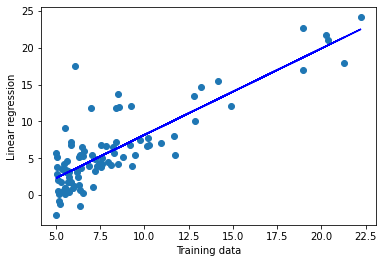

In [47]:

# Plot the data
plt.scatter(x, y)

# Plot the linear fit
plt.plot(X[:,1], h_theta(X,theta),'-b')
plt.xlabel('Training data')
plt.ylabel('Linear regression')

### Prediction

In [52]:
#Prediction

testFeatures = addBias(testData[:,0].reshape(-1,1))
testResult = testData[:,1]
predict(testFeatures,theta)

[[ 2.65422584]
 [ 6.1640145 ]
 [12.1553224 ]
 [ 2.80868943]]
